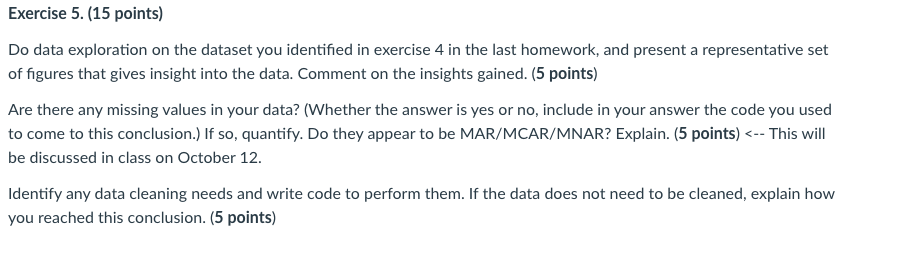

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('ventilator-pressure-prediction/train.csv')

In [119]:
train.groupby('breath_id')['id'].count()

breath_id
1         80
2         80
3         80
4         80
5         80
          ..
125740    80
125742    80
125743    80
125745    80
125749    80
Name: id, Length: 75450, dtype: int64

In [83]:
train['RC'].unique()

array([1000,  400, 2500,  250,  100,  500,  200,   50])

In [93]:
train[(train['breath_id']==9)]['RC'].unique()# & (train['RC']==200)]

array([400])

In [107]:
pt = pd.pivot_table(train, index=['breath_id','RC','u_in','u_out'], values=['pressure'])

In [108]:
pt

pressure
breath_id RC   u_in      u_out           
1         1000 0.000000  1       9.240116
               0.083334  0       5.837492
               0.779225  1       7.524743
               1.439041  1       6.962326
               1.994220  1       7.454441
...                                   ...
125749    500  14.700098 0      17.015533
               16.101221 0      15.468886
               16.266744 0      15.117375
               21.614707 0       9.563505
               25.504196 0       5.345377

[4696014 rows x 1 columns]

In [110]:
# pt1 = pd.pivot_table(train, index=['breath_id'], values=['pressure'])

In [164]:
len(train['id'].unique())==len(train)

True

In [165]:
# train[train['breath_id']==1]

In [55]:
train[['R','C','u_in','pressure']].describe()

,R,C,u_in,pressure
count,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06
mean,2.703618e+01,2.608072e+01,7.321615e+00,1.122041e+01
std,1.959549e+01,1.715231e+01,1.343470e+01,8.109703e+00
min,5.000000e+00,1.000000e+01,0.000000e+00,-1.895744e+00
25%,5.000000e+00,1.000000e+01,3.936623e-01,6.329607e+00
50%,2.000000e+01,2.000000e+01,4.386146e+00,7.032628e+00
75%,5.000000e+01,5.000000e+01,4.983895e+00,1.364103e+01
max,5.000000e+01,5.000000e+01,1.000000e+02,6.482099e+01


In [18]:
train['u_out'].value_counts()

1    3745032
0    2290968
Name: u_out, dtype: int64

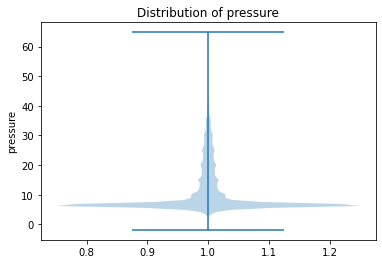

In [138]:
plt.violinplot(train['pressure'])
plt.ylabel('pressure')
plt.title('Distribution of pressure')
plt.show()

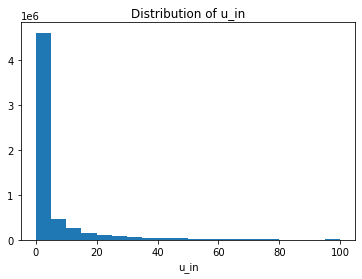

In [140]:
plt.hist(train['u_in'],bins=20)
plt.title('Distribution of u_in')
plt.xlabel('u_in')
plt.show()



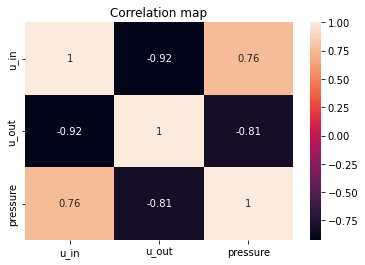

In [129]:
import seaborn as sns
sns.heatmap(train[train['breath_id']==1][['u_in','u_out','pressure']].corr(), annot=True)
plt.title('Correlation map')
plt.show()

In [166]:
# plt.scatter(train[train['breath_id']==100]['u_in'], train[train['breath_id']==100]['u_out'], c=train[train['breath_id']==100]['pressure'], cmap='jet')

In [167]:
# train[train['breath_id']==1][train[train['breath_id']==1]['u_in']<0.01]

In [168]:
# plt.scatter(train[train['breath_id']==10000]['u_in'], train[train['breath_id']==10000]['pressure'], c=train[train['breath_id']==10000]['u_out'], cmap='jet')

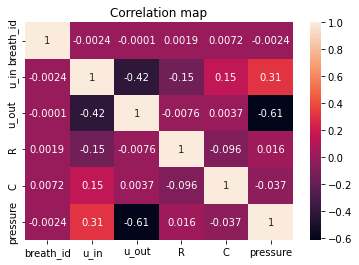

In [120]:
import seaborn as sns
sns.heatmap(train[['breath_id','u_in','u_out', 'R','C', 'pressure']].corr(), annot=True)
plt.title('Correlation map')
plt.show()

In [144]:
df = pd.read_csv("ventilator-pressure-prediction/train.csv", na_values = ['--', 'N/A', 'na'])
print(df.isnull().sum())


id           0
breath_id    0
R            0
C            0
time_step    0
u_in         0
u_out        0
pressure     0
dtype: int64
